In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gc
import data_utils as dutils
from datetime import datetime

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

%matplotlib inline

In [3]:
df = dutils.loadData()

In [4]:
df.head()

,CODNEG,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT
DATPRG,,,,,,,,,,,
2008-12-02,BOVA11,35.11,35.81,34.91,35.29,35.39,35.05,35.39,150,759900,26819970.0
2008-12-03,BOVA11,34.73,35.40,33.90,34.78,35.31,35.31,35.65,273,330600,11500367.0
2008-12-04,BOVA11,35.80,36.00,35.15,35.46,35.70,33.90,0.00,76,128400,4554168.0
2008-12-05,BOVA11,34.51,35.35,34.11,34.44,35.35,36.00,100.00,68,193700,6671196.0
2008-12-08,BOVA11,37.35,38.46,36.95,37.41,38.46,37.70,100.00,42,103100,3857295.0


In [7]:
df.describe()

,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT
count,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2737.000000,2.737000e+03,2.737000e+03
mean,62.015119,62.537245,61.406946,61.956807,61.990358,61.511019,61.853233,9282.063208,2.100838e+06,1.399490e+08
std,15.037140,15.068925,14.963729,15.024142,15.022249,15.865366,15.986568,12354.693588,1.760343e+06,1.446169e+08
min,34.510000,35.350000,33.900000,34.440000,35.310000,0.000000,0.000000,18.000000,4.400000e+03,1.816440e+05
25%,51.670000,52.090000,51.100000,51.530000,51.550000,51.300000,51.600000,1785.000000,7.414000e+05,4.179603e+07
50%,58.500000,59.020000,57.980000,58.480000,58.510000,58.400000,58.800000,4818.000000,1.712980e+06,9.570022e+07
75%,68.360000,68.870000,67.740000,68.340000,68.310000,68.150000,68.650000,11775.000000,2.984080e+06,1.796022e+08
max,113.000000,113.840000,111.770000,112.380000,112.810000,112.770000,112.810000,95962.000000,1.716595e+07,1.413534e+09


In [8]:
df.tail()

,CODNEG,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT
DATPRG,,,,,,,,,,,
2019-12-20,BOVA11,110.82,110.86,110.28,110.65,110.84,110.84,110.88,46409,4031320,446069777.7
2019-12-23,BOVA11,110.80,111.67,110.69,110.94,111.67,111.67,111.90,66179,6090570,675725327.5
2019-12-26,BOVA11,111.61,112.98,111.40,112.35,112.81,112.77,112.81,94411,4068930,457151693.1
2019-12-27,BOVA11,113.00,113.84,111.77,112.38,112.17,112.17,112.20,64233,7706740,866153413.9
2019-12-30,BOVA11,112.78,112.82,111.23,111.99,111.23,111.20,111.23,22865,3279050,367226482.1


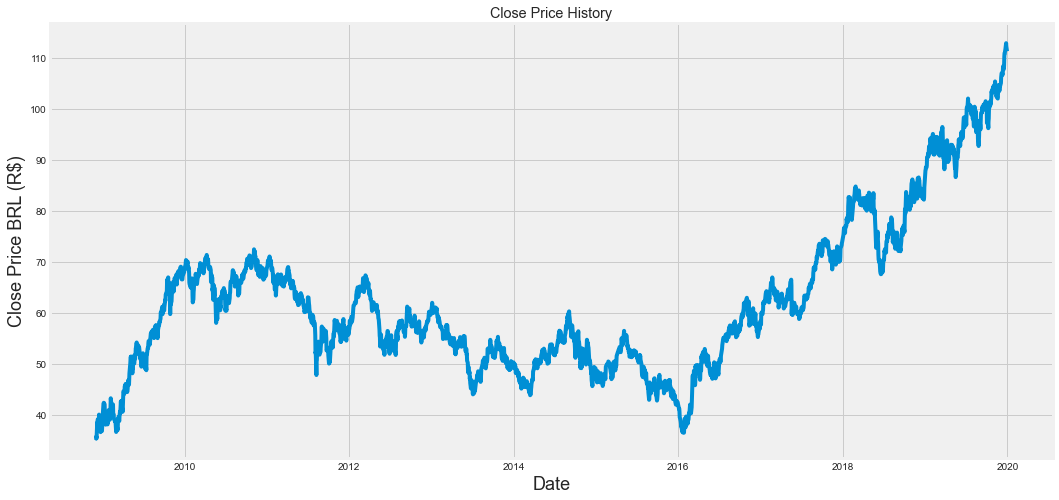

In [9]:
# Let's see a historical view of the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['PREULT'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price BRL (R$)', fontsize=18)
plt.show()

In [10]:
data = df.filter(['PREULT'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .8))
training_data_len

2190

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00103226],
       [0.        ],
       [0.00503226],
       ...,
       [1.        ],
       [0.99174194],
       [0.9796129 ]])

In [12]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00103226, 0.        , 0.00503226, 0.00051613, 0.04064516,
       0.02877419, 0.048     , 0.04619355, 0.04903226, 0.04206452,
       0.06051613, 0.05032258, 0.04954839, 0.04929032, 0.03148387,
       0.01612903, 0.02051613, 0.01909677, 0.03006452, 0.06464516,
       0.08632258, 0.09045161, 0.06877419, 0.08890323, 0.08632258,
       0.05664516, 0.06051613, 0.03509677, 0.05225806, 0.05393548,
       0.04696774, 0.04748387, 0.04567742, 0.03780645, 0.03574194,
       0.0476129 , 0.04748387, 0.07212903, 0.05535484, 0.05535484,
       0.0476129 , 0.06051613, 0.06567742, 0.07987097, 0.10180645,
       0.08632258, 0.07780645, 0.07341935, 0.07070968, 0.0843871 ,
       0.08619355, 0.06051613, 0.0603871 , 0.06051613, 0.05019355,
       0.04309677, 0.0443871 , 0.0443871 , 0.01664516, 0.01883871])]
[0.04503225806451605]

[array([0.00103226, 0.        , 0.00503226, 0.00051613, 0.04064516,
       0.02877419, 0.048     , 0.04619355, 0.04903226, 0.04206452,
       0.06051613, 0.05032258, 0.04

(2130, 60, 1)

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2130/2130 [==============================] - 43s 20ms/step - loss: 9.1899e-04


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.465370418038049

In [18]:
valid = data[training_data_len:]
valid

,PREULT
DATPRG,
2017-10-09,73.21
2017-10-10,74.24
2017-10-11,74.13
2017-10-13,74.45
2017-10-16,74.34
...,...
2019-12-20,110.84
2019-12-23,111.67
2019-12-26,112.81


/Users/marcelcanhisares/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


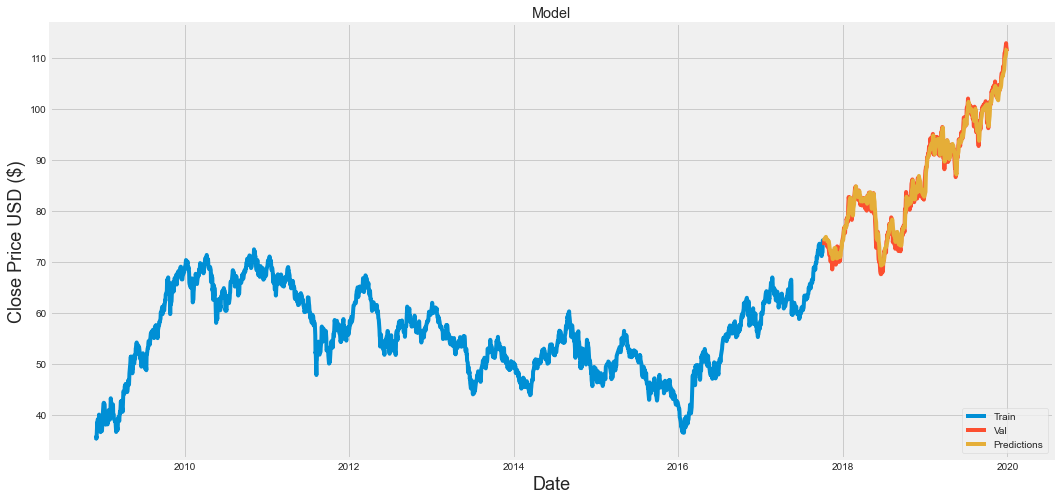

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['PREULT'])
plt.plot(valid[['PREULT', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,PREULT,Predictions
DATPRG,,
2017-10-09,73.21,74.516899
2017-10-10,74.24,74.323029
2017-10-11,74.13,74.454254
2017-10-13,74.45,74.572205
2017-10-16,74.34,74.752930
...,...,...
2019-12-20,110.84,109.562904
2019-12-23,111.67,110.159798
2019-12-26,112.81,110.758507
